In [13]:
import joblib
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score,auc
# from imblearn.pipeline import Pipeline as imPipeline
# from imblearn.over_sampling import ADASYN
import warnings
warnings.filterwarnings("ignore")


In [3]:
X_train = joblib.load("../src/X_train.pkl")
X_test = joblib.load("../src/X_test.pkl")
y_train = joblib.load("../src/y_train.pkl")
y_test = joblib.load("../src/y_test.pkl")

In [4]:
# final_pipeline = joblib.load("final_pipeline.pkl")
loaded = joblib.load("../src/final_pipeline_with_meta.pkl")
final_pipeline = loaded["model"]
print("Model was saved with sklearn version:", loaded["sklearn_version"])


Model was saved with sklearn version: 1.3.2


In [5]:
# import sklearn
# print(sklearn.__version__)
# ! pip uninstall scikit-learn -y
# ! pip install scikit-learn==1.3.2 --force-reinstall
y_probs = final_pipeline.predict_proba(X_test)[:, 1]
print(y_probs)

[0.17106257 0.25055214 0.39925192 ... 0.65659944 0.19748865 0.69087131]


In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.2f}")


AUC Score: 0.75


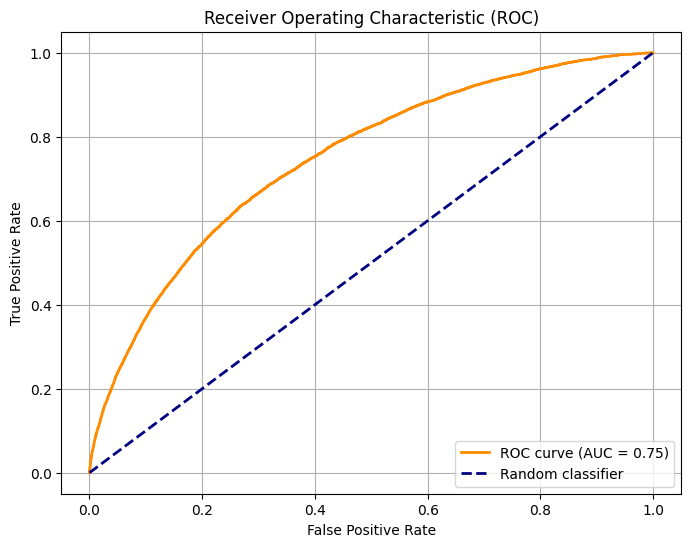

In [15]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
# plt.show()
plt.savefig("../output/roc_curve.png", dpi=300, bbox_inches='tight')


In [9]:
# prediction for best model
y_pred = final_pipeline.predict(X_test)

In [10]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     67681
           1       0.22      0.69      0.33      8924

    accuracy                           0.67     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.67      0.73     76605



In [12]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[45277, 22404],
       [ 2722,  6202]], dtype=int64)

In [16]:
# ! pip install pipdeptree